In [38]:
import pandas as pd
import glob
import numpy as np
import cufflinks as cf
import json
cf.go_offline()
import matplotlib.pyplot as plt

In [68]:
def load_results(path, ty='stats'):    
    return {file: json.load(open(file))[ty] for file in glob.glob(path) if 'pdf' not in file}

In [42]:
def get_algo_name(keyval):
    harsh = keyval.split('_')[-1]
    algo = keyval.split('_')[-2].split(".")[-1][:-1]
    track = keyval.split("/")[-1][0]
    return (track, algo, harsh)

In [58]:
for file in glob.glob("L*.pdf"):
    print("""
    \\begin{subfigure}[t]{0.2\\textwidth}
    \centering
    \includegraphics[width=\\textwidth]{""" + file + """}
    \end{subfigure}
    """)


    \begin{subfigure}[t]{0.2\textwidth}
    \centering
    \includegraphics[width=\textwidth]{Ltrack_2_learning_rate.pdf}
    \end{subfigure}
    

    \begin{subfigure}[t]{0.2\textwidth}
    \centering
    \includegraphics[width=\textwidth]{Ltrack_3_learning_rate.pdf}
    \end{subfigure}
    

    \begin{subfigure}[t]{0.2\textwidth}
    \centering
    \includegraphics[width=\textwidth]{Ltrack_6_learning_rate.pdf}
    \end{subfigure}
    

    \begin{subfigure}[t]{0.2\textwidth}
    \centering
    \includegraphics[width=\textwidth]{Ltrack_5_learning_rate.pdf}
    \end{subfigure}
    

    \begin{subfigure}[t]{0.2\textwidth}
    \centering
    \includegraphics[width=\textwidth]{Ltrack_1_learning_rate.pdf}
    \end{subfigure}
    

    \begin{subfigure}[t]{0.2\textwidth}
    \centering
    \includegraphics[width=\textwidth]{Ltrack_4_learning_rate.pdf}
    \end{subfigure}
    


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


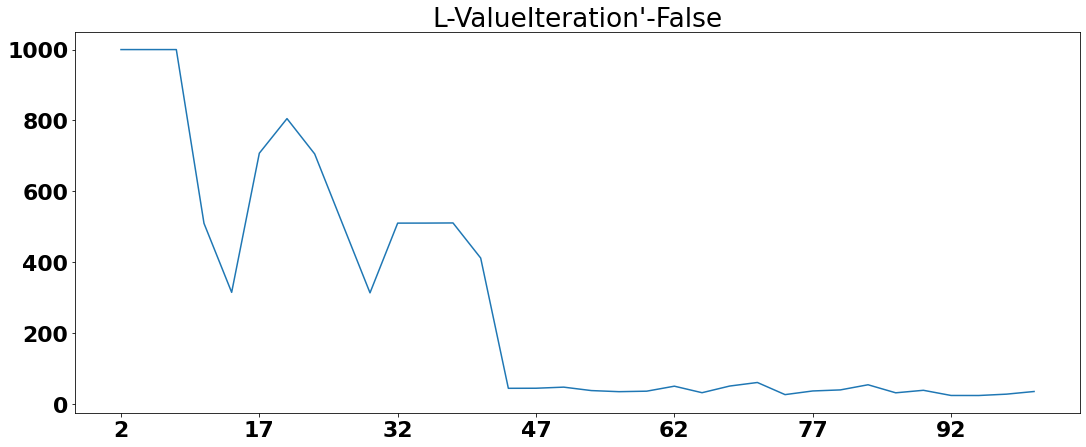

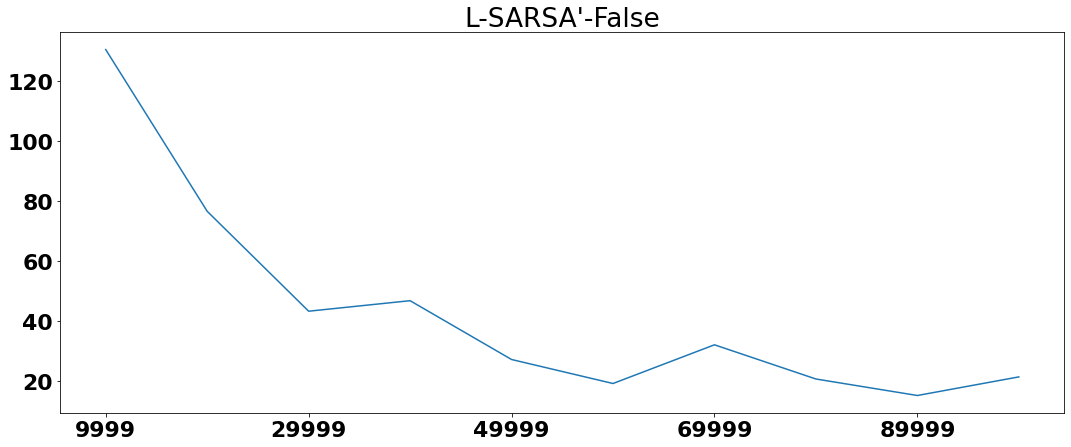

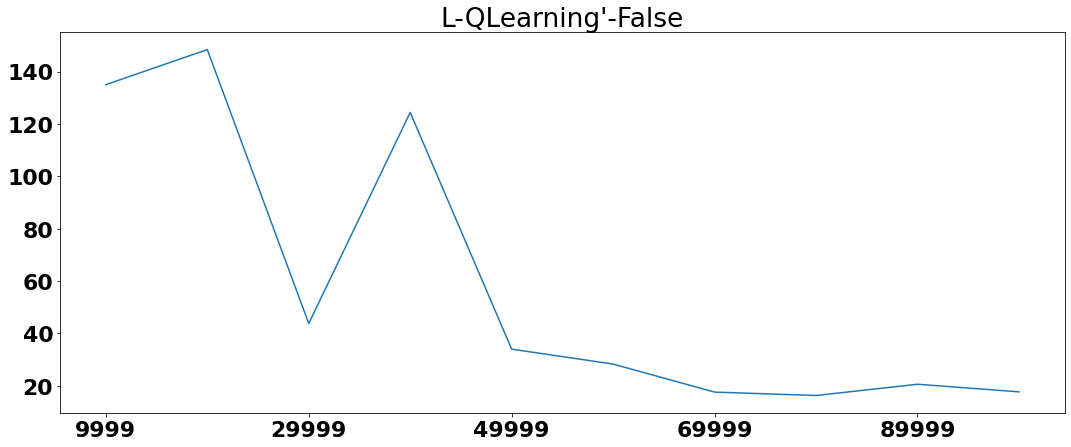

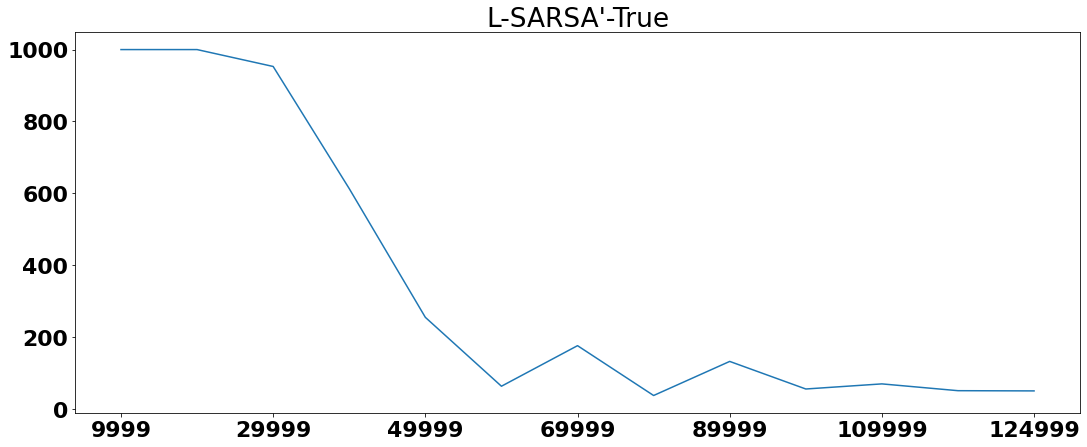

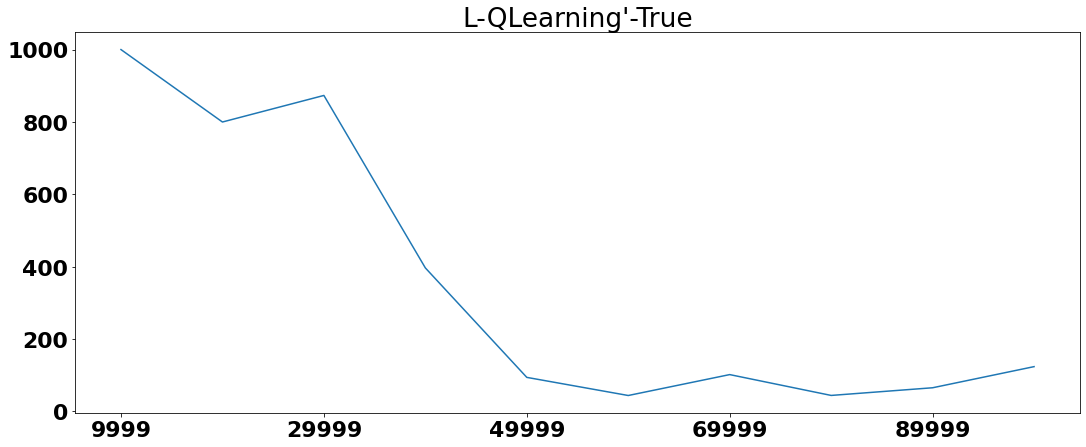

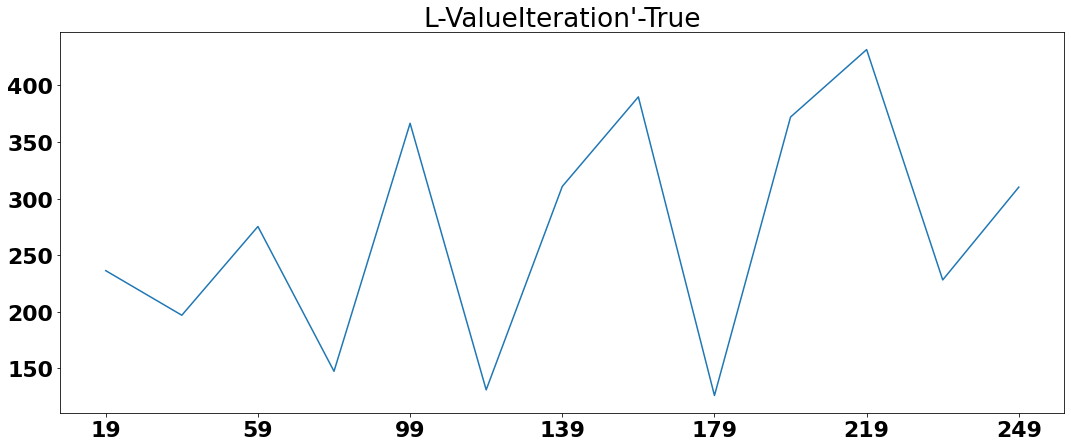

In [59]:
i = 0
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

for file, results in  load_results('../../L-*').items():
    i +=1
    pd.DataFrame(results).T.mean(axis=1).plot(figsize=(18, 7), title='-'.join(get_algo_name(file)))
    plt.savefig(f"Ltrack_{i}_learning_rate.pdf")
    plt.show()
    


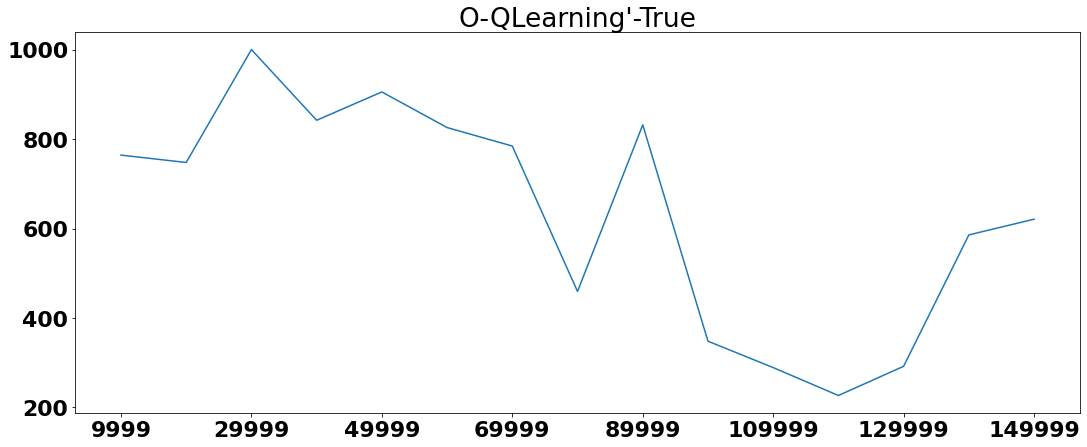

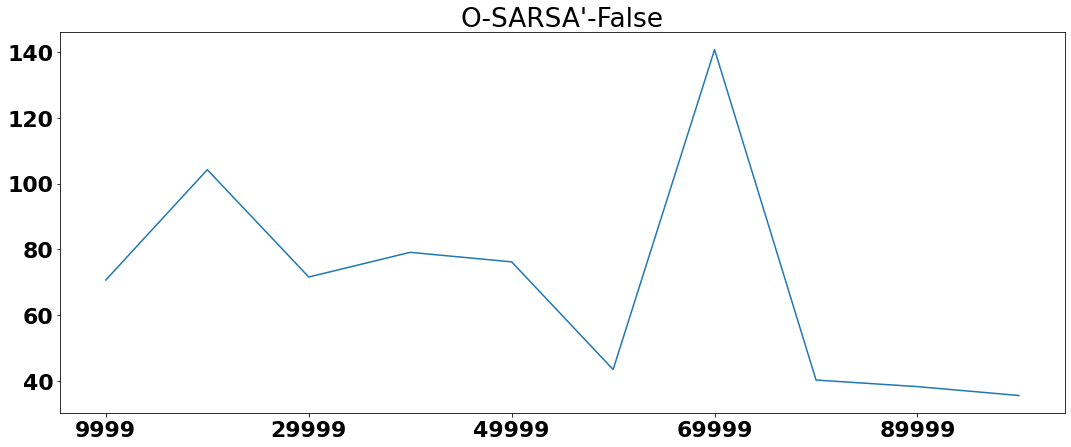

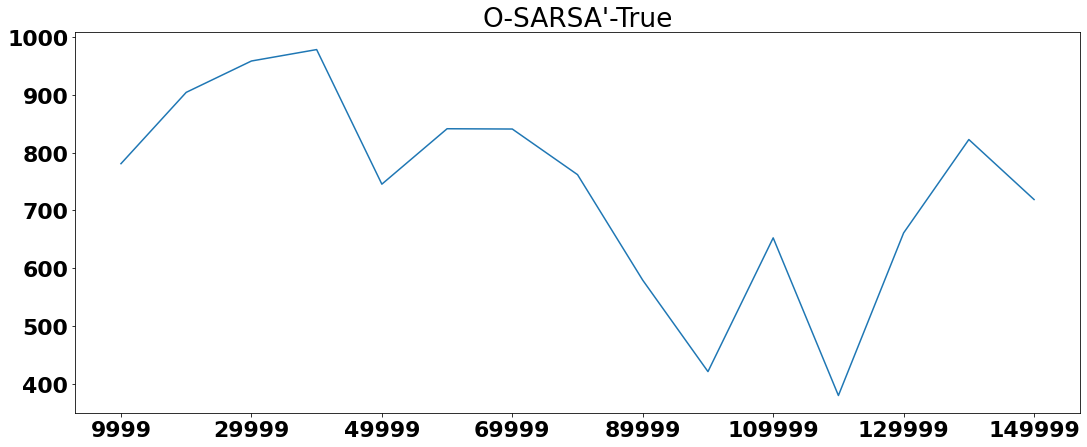

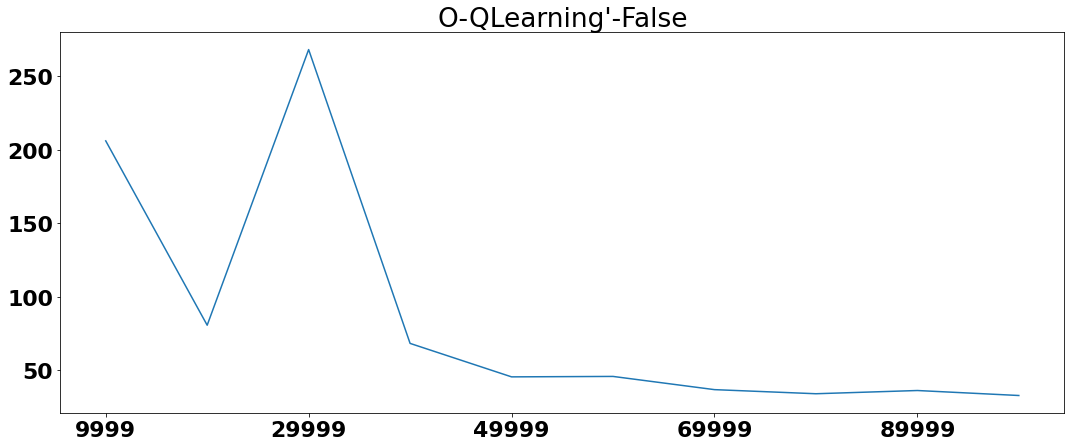

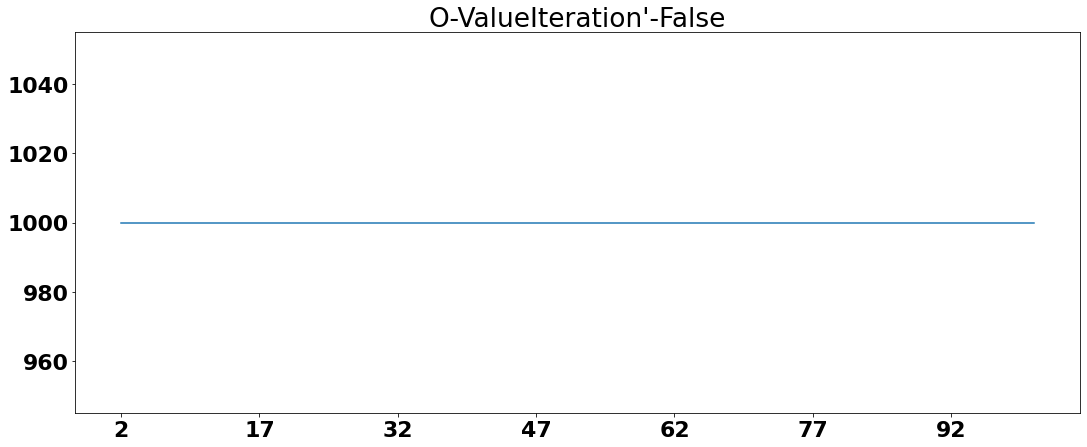

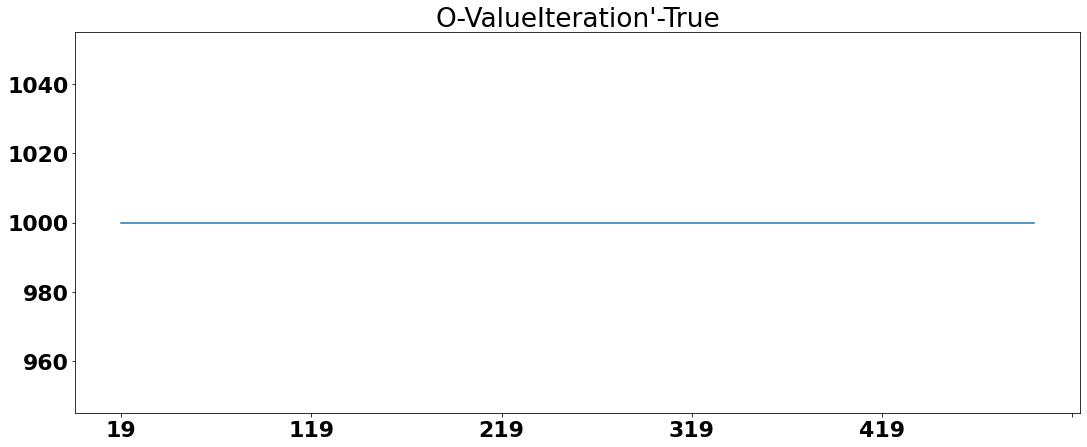

In [60]:
i = 0
for file, results in  load_results('../../O-*').items():
    i +=1
    pd.DataFrame(results).T.mean(axis=1).plot(figsize=(18, 7), title='-'.join(get_algo_name(file)))
    plt.savefig(f"Otrack_{i}_learning_rate.pdf")
    plt.show()
    


In [69]:
q_false = load_results("../../R*Q*", 'policy')["../../R-track.txt_<class 'machine_learning.reinforcement_learning.algorithms.QLearning'>_False"]

In [85]:
from machine_learning.reinforcement_learning import actors, algorithms
track = actors.Track("R-Track.txt")

In [ ]:
from machine_learning.reinforcement_learning import actors, policy
from machine_learning.reinforcement_learning.algorithms import *
import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from itertools import product
from joblib import Parallel, delayed

DIR = "/Users/home/Documents/JHU/machine_learning/course_projects/project6"

TRACKS = ["R-track.txt"]
ALGOS = [ValueIteration]
HARSH_CRASH = [True]
ALGO_KWARGS = {
    ("R-track.txt", ValueIteration, True): dict(
        discount_factor=.01,
        max_iter=200,
    ),
}

def run_experiment(track, algo, crash_variant, kwargs):
    np.random.seed(73)
    track_obj = actors.Track(f"{DIR}/{track}", harsh_crash_variant=crash_variant)
    track_obj.start_track()
    logger.info(f"Initializing track {track} with harsh_variant={crash_variant}")

    ALGO_KWARGS.update(
        {
            'fname': f"{track}_{algo}_{crash_variant}_{kwargs.get('discount_factor')}_test"
        }
    )

    pi = policy.Policy(states=track_obj.get_states(), actions=track_obj.get_actions())


    algo_object = algo(
        policy=pi, actor=track_obj,
        **kwargs
    )
    

    logger.info(f"Updating policy via {algo}...")
    algo_object.explore()
    return algo_object

#     results = []
#     for _ in range(20):
#         path, steps = algo_object.exploit()
#         results.append(steps)

#     logger.info(kwargs)
#     logger.info(f"Avg Steps to Solve: {np.mean(results)}")


results = Parallel(n_jobs=1)(
    delayed(run_experiment)(
        track=track,
        algo=algo,
        crash_variant=crash_variant,
        kwargs=dict(
            ALGO_KWARGS.get((track, algo, crash_variant)),
            max_exploit=5
        )
    ) for track, algo, crash_variant in product(TRACKS, ALGOS, HARSH_CRASH)
    if track[0] == "R"
)


INFO:machine_learning.reinforcement_learning.algorithms:Initializing track R-track.txt with harsh_variant=True
INFO:machine_learning.reinforcement_learning.algorithms:Updating policy via <class 'machine_learning.reinforcement_learning.algorithms.ValueIteration'>...
 16%|█▌        | 5406/34848 [00:24<02:19, 210.84it/s]


 32%|███▏      | 11147/34848 [00:43<01:25, 277.66it/s]


 50%|█████     | 17504/34848 [01:00<01:14, 232.50it/s]


 69%|██████▉   | 24131/34848 [01:22<00:46, 232.09it/s]


 87%|████████▋ | 30343/34848 [01:46<00:21, 205.11it/s]


  4%|▍         | 1506/34848 [00:05<01:58, 280.71it/s]


 22%|██▏       | 7663/34848 [00:27<01:23, 323.69it/s]


 39%|███▊      | 13419/34848 [00:45<01:03, 337.05it/s]


 57%|█████▋    | 19699/34848 [01:02<00:42, 357.82it/s]


 75%|███████▍  | 26061/34848 [01:25<00:37, 236.95it/s]


 93%|█████████▎| 32331/34848 [01:50<00:10, 245.11it/s]


 11%|█         | 3823/34848 [00:14<02:43, 190.15it/s]


 29%|██▉       | 10115/34848 [00:34<01:38, 250.44it/s]


 47%|████▋     | 16210/34848 [00:51<00:56, 332.26it/s]


 65%|██████▍   | 22564/34848 [01:11<00:46, 262.81it/s]


 82%|████████▏ | 28535/34848 [01:35<00:32, 196.68it/s]


  2%|▏         | 3/200 [06:01<6:38:00, 121.22s/it]


 18%|█▊        | 6283/34848 [00:22<02:38, 179.81it/s]


 35%|███▍      | 12148/34848 [00:41<01:29, 253.14it/s]


 53%|█████▎    | 18572/34848 [00:58<00:58, 279.59it/s]


 72%|███████▏  | 24953/34848 [01:20<00:34, 289.51it/s]


 90%|████████▉ | 31310/34848 [01:44<00:14, 239.69it/s]


  8%|▊         | 2746/34848 [00:10<01:44, 305.82it/s]


 25%|██▌       | 8830/34848 [00:31<01:59, 218.16it/s]


 43%|████▎     | 14848/34848 [00:48<01:04, 311.93it/s]


 61%|██████▏   | 21356/34848 [01:07<00:58, 229.46it/s]


 79%|███████▊  | 27412/34848 [01:30<00:40, 181.88it/s]


 97%|█████████▋| 33889/34848 [01:55<00:03, 298.34it/s]


 12%|█▏        | 4083/34848 [00:22<03:01, 169.42it/s]


 25%|██▌       | 8792/34848 [00:45<01:45, 246.39it/s]


 42%|████▏     | 14665/34848 [01:02<01:07, 297.34it/s]


 61%|██████    | 21237/34848 [01:20<00:50, 270.35it/s]


 79%|███████▊  | 27382/34848 [01:44<00:30, 244.81it/s]


 97%|█████████▋| 33829/34848 [02:09<00:03, 281.19it/s]


 17%|█▋        | 5753/34848 [00:20<01:14, 390.49it/s]


 33%|███▎      | 11537/34848 [00:38<01:09, 333.06it/s]


 51%|█████     | 17849/34848 [00:55<00:47, 356.12it/s]


 70%|██████▉   | 24284/34848 [01:17<00:53, 199.08it/s]


 88%|████████▊ | 30578/34848 [01:41<00:18, 231.70it/s]


  5%|▌         | 1853/34848 [00:07<02:22, 230.91it/s]


 23%|██▎       | 7982/34848 [00:28<01:40, 268.47it/s]


 39%|███▉      | 13759/34848 [00:46<01:08, 306.99it/s]


 58%|█████▊    | 20135/34848 [01:03<00:35, 415.97it/s]


 76%|███████▌  | 26325/34848 [01:27<00:46, 184.48it/s]


 93%|█████████▎| 32497/34848 [01:51<00:14, 159.32it/s]


 13%|█▎        | 4371/34848 [00:15<01:19, 381.63it/s]


 30%|███       | 10586/34848 [00:35<01:23, 290.99it/s]


 48%|████▊     | 16603/34848 [00:52<00:59, 309.11it/s]


 66%|██████▋   | 23158/34848 [01:12<00:53, 216.88it/s]


 84%|████████▍ | 29378/34848 [01:36<00:29, 187.14it/s]


  2%|▏         | 813/34848 [00:03<03:17, 172.54it/s]


 20%|██        | 7081/34848 [00:25<01:27, 318.22it/s]


 38%|███▊      | 13152/34848 [00:43<01:14, 292.89it/s]


 56%|█████▌    | 19449/34848 [01:00<00:50, 302.03it/s]


 74%|███████▍  | 25850/34848 [01:23<00:47, 187.63it/s]


 92%|█████████▏| 32122/34848 [01:47<00:14, 193.28it/s]


 10%|█         | 3543/34848 [00:12<02:11, 237.63it/s]


 28%|██▊       | 9590/34848 [00:33<01:12, 346.88it/s]


 44%|████▍     | 15499/34848 [00:50<01:16, 254.24it/s]


 63%|██████▎   | 21850/34848 [01:09<00:53, 242.61it/s]


 82%|████████▏ | 28413/34848 [01:33<00:20, 316.75it/s]


  5%|▌         | 1869/34848 [00:05<01:30, 364.55it/s]


 28%|██▊       | 9909/34848 [00:26<01:23, 299.30it/s]


 52%|█████▏    | 17979/34848 [00:43<00:29, 573.61it/s]


 76%|███████▌  | 26353/34848 [01:06<00:34, 244.81it/s]


 99%|█████████▉| 34631/34848 [01:31<00:00, 411.48it/s]


 23%|██▎       | 8043/34848 [00:21<00:54, 492.83it/s]


 45%|████▍     | 15647/34848 [00:38<00:47, 400.92it/s]


 69%|██████▉   | 24126/34848 [00:59<00:39, 270.63it/s]


 93%|█████████▎| 32269/34848 [01:25<00:10, 237.24it/s]


 17%|█▋        | 5765/34848 [00:15<00:58, 500.78it/s]


 39%|███▊      | 13428/34848 [00:34<00:45, 475.47it/s]


 63%|██████▎   | 21826/34848 [00:52<00:36, 359.09it/s]


 85%|████████▌ | 29726/34848 [01:17<00:21, 233.69it/s]


  9%|▉         | 3243/34848 [00:08<01:43, 306.60it/s]


 32%|███▏      | 11102/34848 [00:28<01:05, 362.00it/s]


 55%|█████▌    | 19229/34848 [00:45<00:32, 482.81it/s]


 79%|███████▉  | 27627/34848 [01:10<00:22, 317.21it/s]


  3%|▎         | 953/34848 [00:02<02:29, 226.72it/s]


 26%|██▌       | 9049/34848 [00:24<01:08, 376.24it/s]


 49%|████▊     | 16914/34848 [00:41<00:35, 506.23it/s]


 72%|███████▏  | 25168/34848 [01:02<00:23, 411.85it/s]


 96%|█████████▌| 33464/34848 [01:28<00:04, 287.54it/s]


 20%|█▉        | 6802/34848 [00:18<01:21, 342.55it/s]


 43%|████▎     | 14811/34848 [00:36<00:38, 523.42it/s]


 66%|██████▌   | 22930/34848 [00:56<00:37, 317.86it/s]


 90%|█████████ | 31417/34848 [01:22<00:12, 281.60it/s]


 14%|█▍        | 4980/34848 [00:13<01:34, 316.14it/s]


 38%|███▊      | 13072/34848 [00:32<00:43, 502.96it/s]


 61%|██████▏   | 21357/34848 [00:49<00:44, 302.85it/s]


 85%|████████▍ | 29484/34848 [01:15<00:23, 228.98it/s]


  8%|▊         | 2946/34848 [00:08<01:13, 434.44it/s]


 31%|███▏      | 10955/34848 [00:28<01:15, 317.53it/s]


 55%|█████▍    | 19030/34848 [00:45<00:29, 535.90it/s]


 79%|███████▊  | 27380/34848 [01:09<00:26, 276.78it/s]


 10%|▉         | 19/200 [34:12<4:42:19, 93.59s/it]INFO:machine_learning.reinforcement_learning.algorithms:Collecting stats...

  2%|▏         | 833/34848 [00:02<02:12, 256.02it/s]


 26%|██▌       | 8925/34848 [00:23<01:16, 337.47it/s]


 49%|████▊     | 16970/34848 [00:40<00:40, 438.76it/s]


 73%|███████▎  | 25511/34848 [01:02<00:34, 271.47it/s]


 97%|█████████▋| 33840/34848 [01:28<00:02, 386.42it/s]


 21%|██        | 7217/34848 [00:19<00:58, 471.01it/s]


 43%|████▎     | 14943/34848 [00:37<00:38, 519.92it/s]


 67%|██████▋   | 23210/34848 [00:56<00:53, 217.38it/s]


 90%|█████████ | 31420/34848 [01:22<00:11, 287.45it/s]


 14%|█▍        | 5003/34848 [00:13<01:48, 275.50it/s]


 37%|███▋      | 12765/34848 [00:32<00:41, 535.12it/s]


 59%|█████▉    | 20685/34848 [00:49<00:58, 241.18it/s]


 83%|████████▎ | 29002/34848 [01:15<00:23, 245.75it/s]


  7%|▋         | 2399/34848 [00:07<02:02, 264.95it/s]


 30%|███       | 10604/34848 [00:27<01:05, 371.99it/s]


 53%|█████▎    | 18637/34848 [00:44<00:33, 487.94it/s]


 77%|███████▋  | 26955/34848 [01:07<00:33, 238.26it/s]


  0%|          | 120/34848 [00:00<01:02, 553.48it/s]


 24%|██▍       | 8480/34848 [00:22<01:04, 410.86it/s]


 47%|████▋     | 16337/34848 [00:39<00:31, 581.17it/s]


 71%|███████   | 24729/34848 [01:00<00:29, 338.87it/s]


 94%|█████████▍| 32864/34848 [01:26<00:08, 239.78it/s]


 18%|█▊        | 6172/34848 [00:17<01:34, 303.00it/s]


 41%|████      | 14163/34848 [00:35<00:40, 516.72it/s]


 64%|██████▍   | 22380/34848 [00:54<00:35, 347.97it/s]


 88%|████████▊ | 30700/34848 [01:20<00:12, 323.98it/s]


 12%|█▏        | 4245/34848 [00:11<01:03, 478.66it/s]


 34%|███▍      | 11960/34848 [00:30<00:52, 433.90it/s]


 58%|█████▊    | 20106/34848 [00:47<00:27, 533.26it/s]


 82%|████████▏ | 28589/34848 [01:12<00:19, 327.74it/s]


  6%|▌         | 2032/34848 [00:05<02:08, 255.76it/s]


 29%|██▉       | 10023/34848 [00:27<01:10, 351.25it/s]


 52%|█████▏    | 18062/34848 [00:43<00:35, 469.07it/s]


 76%|███████▌  | 26492/34848 [01:07<00:35, 236.06it/s]


 99%|█████████▉| 34624/34848 [01:32<00:00, 388.01it/s]


 23%|██▎       | 7976/34848 [00:21<01:03, 423.74it/s]


 46%|████▌     | 15893/34848 [00:38<00:39, 474.58it/s]


 70%|███████   | 24421/34848 [01:00<00:44, 233.24it/s]


 93%|█████████▎| 32526/34848 [01:25<00:08, 267.91it/s]


 17%|█▋        | 5934/34848 [00:16<01:18, 370.51it/s]


 40%|███▉      | 13789/34848 [00:34<00:39, 530.80it/s]


 64%|██████▍   | 22216/34848 [00:52<00:27, 460.81it/s]


 88%|████████▊ | 30641/34848 [01:19<00:12, 343.27it/s]


 12%|█▏        | 4216/34848 [00:11<00:58, 524.73it/s]


 34%|███▍      | 11874/34848 [00:30<00:44, 514.15it/s]


 56%|█████▋    | 19655/34848 [00:47<00:27, 552.88it/s]


 81%|████████  | 28122/34848 [01:12<00:14, 452.29it/s]


  4%|▎         | 1277/34848 [00:03<02:01, 276.91it/s]


 26%|██▌       | 9114/34848 [00:25<01:06, 385.97it/s]


 49%|████▊     | 16980/34848 [00:42<00:33, 526.31it/s]


 73%|███████▎  | 25287/34848 [01:04<00:24, 396.05it/s]


 96%|█████████▌| 33471/34848 [01:29<00:04, 311.51it/s]


 19%|█▉        | 6794/34848 [00:19<01:13, 379.88it/s]


 43%|████▎     | 14813/34848 [00:36<00:40, 497.02it/s]


 67%|██████▋   | 23291/34848 [00:56<00:40, 286.21it/s]


 91%|█████████ | 31713/34848 [01:22<00:11, 279.70it/s]


 15%|█▍        | 5096/34848 [00:14<01:38, 302.47it/s]


 37%|███▋      | 12865/34848 [00:32<00:39, 554.15it/s]


 61%|██████    | 21241/34848 [00:50<00:39, 342.83it/s]


 84%|████████▍ | 29361/34848 [01:15<00:25, 213.42it/s]


  9%|▊         | 3012/34848 [00:08<01:25, 372.62it/s]


 31%|███       | 10828/34848 [00:28<01:22, 292.55it/s]


 54%|█████▍    | 18893/34848 [00:45<00:27, 589.12it/s]


 79%|███████▊  | 27440/34848 [01:10<00:30, 239.39it/s]


  2%|▏         | 830/34848 [00:02<02:16, 248.79it/s]


 26%|██▌       | 8943/34848 [00:23<01:22, 312.52it/s]


 48%|████▊     | 16684/34848 [00:40<00:58, 309.06it/s]


 71%|███████▏  | 24880/34848 [01:02<00:33, 298.84it/s]


 95%|█████████▍| 33094/34848 [01:28<00:07, 238.29it/s]


 19%|█▉        | 6552/34848 [00:18<01:34, 298.31it/s]


 41%|████      | 14371/34848 [00:35<00:49, 412.22it/s]


 65%|██████▍   | 22616/34848 [00:54<00:47, 256.22it/s]


 87%|████████▋ | 30378/34848 [01:20<00:16, 265.00it/s]


 11%|█         | 3785/34848 [00:10<01:40, 309.31it/s]


 34%|███▍      | 11788/34848 [00:30<00:44, 520.86it/s]


 57%|█████▋    | 19995/34848 [00:46<00:25, 587.11it/s]


 81%|████████  | 28292/34848 [01:11<00:19, 333.76it/s]


  4%|▍         | 1550/34848 [00:04<01:47, 308.56it/s]


 28%|██▊       | 9588/34848 [00:26<00:58, 434.05it/s]


 49%|████▉     | 17165/34848 [00:42<00:32, 537.00it/s]


 73%|███████▎  | 25511/34848 [01:04<00:31, 297.90it/s]


 97%|█████████▋| 33670/34848 [01:30<00:02, 417.93it/s]


 20%|█▉        | 6861/34848 [00:19<01:14, 376.76it/s]


 42%|████▏     | 14679/34848 [00:36<00:39, 505.22it/s]


 66%|██████▌   | 23085/34848 [00:56<00:53, 220.36it/s]


 89%|████████▉ | 31188/34848 [01:21<00:10, 351.00it/s]


 20%|█▉        | 39/200 [1:05:03<4:09:13, 92.88s/it]INFO:machine_learning.reinforcement_learning.algorithms:Collecting stats...

 13%|█▎        | 4507/34848 [00:12<01:29, 338.76it/s]


 36%|███▌      | 12414/34848 [00:32<00:43, 512.73it/s]


 60%|█████▉    | 20764/34848 [00:49<00:39, 360.63it/s]


 83%|████████▎ | 28872/34848 [01:14<00:26, 222.76it/s]


  6%|▌         | 2150/34848 [00:06<02:12, 247.65it/s]


 29%|██▉       | 10224/34848 [00:26<00:49, 498.26it/s]


 52%|█████▏    | 18102/34848 [00:43<00:36, 458.58it/s]


 77%|███████▋  | 26672/34848 [01:06<00:25, 316.49it/s]


100%|█████████▉| 34751/34848 [01:33<00:00, 348.56it/s]


 23%|██▎       | 7981/34848 [00:22<01:02, 429.71it/s]


 45%|████▍     | 15670/34848 [00:39<00:49, 389.89it/s]


 69%|██████▉   | 24134/34848 [01:00<00:38, 279.08it/s]


 92%|█████████▏| 32206/34848 [01:25<00:09, 287.83it/s]


 16%|█▌        | 5528/34848 [00:15<01:21, 357.89it/s]


 37%|███▋      | 13025/34848 [00:34<00:54, 400.66it/s]


 61%|██████▏   | 21360/34848 [00:51<00:40, 329.54it/s]


 85%|████████▌ | 29681/34848 [01:17<00:18, 277.25it/s]


  9%|▉         | 3186/34848 [00:08<01:28, 357.69it/s]


 31%|███▏      | 10941/34848 [00:28<01:12, 330.66it/s]


 54%|█████▍    | 18980/34848 [00:45<00:34, 457.83it/s]


 78%|███████▊  | 27262/34848 [01:09<00:28, 261.75it/s]


  2%|▏         | 839/34848 [00:02<02:20, 242.49it/s]


 26%|██▌       | 8935/34848 [00:24<01:25, 302.43it/s]


 48%|████▊     | 16657/34848 [00:40<00:49, 364.85it/s]


 72%|███████▏  | 25001/34848 [01:02<00:26, 368.77it/s]


 95%|█████████▌| 33169/34848 [01:28<00:05, 282.03it/s]


 19%|█▉        | 6536/34848 [00:18<01:29, 316.44it/s]


 42%|████▏     | 14582/34848 [00:36<00:45, 447.57it/s]


 66%|██████▌   | 23038/34848 [00:55<00:41, 282.38it/s]


 89%|████████▉ | 31009/34848 [01:20<00:08, 442.17it/s]


 12%|█▏        | 4186/34848 [00:12<01:06, 462.83it/s]


 35%|███▍      | 12030/34848 [00:31<00:59, 380.40it/s]


 58%|█████▊    | 20346/34848 [00:48<00:34, 422.27it/s]


 82%|████████▏ | 28592/34848 [01:13<00:18, 334.62it/s]


  6%|▌         | 1990/34848 [00:05<01:33, 352.41it/s]


 29%|██▊       | 9991/34848 [00:26<01:06, 372.63it/s]


 51%|█████     | 17638/34848 [00:43<00:39, 434.63it/s]


 75%|███████▌  | 26175/34848 [01:06<00:29, 293.45it/s]


 99%|█████████▉| 34508/34848 [01:31<00:00, 381.37it/s]


 23%|██▎       | 7860/34848 [00:21<00:59, 454.12it/s]


 45%|████▍     | 15653/34848 [00:38<00:43, 437.21it/s]


 69%|██████▉   | 24130/34848 [00:59<00:43, 248.48it/s]


 92%|█████████▏| 32091/34848 [01:25<00:09, 285.65it/s]


 16%|█▌        | 5574/34848 [00:15<01:11, 411.69it/s]


 38%|███▊      | 13372/34848 [00:33<00:44, 477.51it/s]


 63%|██████▎   | 21812/34848 [00:51<00:39, 325.90it/s]


 86%|████████▌ | 30038/34848 [01:17<00:17, 278.47it/s]


 10%|▉         | 3423/34848 [00:09<01:48, 288.40it/s]


 32%|███▏      | 11181/34848 [00:29<01:01, 383.14it/s]


 55%|█████▌    | 19321/34848 [00:45<00:32, 475.04it/s]


 80%|███████▉  | 27786/34848 [01:10<00:24, 287.80it/s]


  4%|▍         | 1392/34848 [00:03<01:52, 298.39it/s]


 27%|██▋       | 9528/34848 [00:25<01:06, 380.58it/s]


 49%|████▉     | 17044/34848 [00:41<00:33, 534.72it/s]


 73%|███████▎  | 25394/34848 [01:03<00:27, 346.64it/s]


 97%|█████████▋| 33671/34848 [01:29<00:02, 406.87it/s]


 20%|█▉        | 6814/34848 [00:19<01:15, 373.33it/s]


 43%|████▎     | 14865/34848 [00:37<00:45, 441.05it/s]


 66%|██████▋   | 23094/34848 [00:56<00:54, 215.69it/s]


 89%|████████▉ | 31068/34848 [01:22<00:10, 361.05it/s]


 14%|█▎        | 4746/34848 [00:12<01:25, 353.30it/s]


 36%|███▋      | 12679/34848 [00:32<00:41, 539.30it/s]


 60%|██████    | 21053/34848 [00:49<00:47, 291.32it/s]


 84%|████████▍ | 29367/34848 [01:15<00:21, 253.59it/s]


  7%|▋         | 2270/34848 [00:06<02:21, 230.16it/s]


 29%|██▉       | 10204/34848 [00:27<00:52, 465.64it/s]


 53%|█████▎    | 18461/34848 [00:44<00:34, 469.90it/s]


 77%|███████▋  | 26789/34848 [01:07<00:27, 287.83it/s]


  1%|          | 250/34848 [00:00<01:16, 454.76it/s]


 24%|██▎       | 8231/34848 [00:22<01:01, 429.92it/s]


 45%|████▍     | 15593/34848 [00:40<00:45, 419.65it/s]


 69%|██████▊   | 23897/34848 [01:00<00:34, 318.11it/s]


 93%|█████████▎| 32258/34848 [01:26<00:10, 243.95it/s]


 16%|█▋        | 5736/34848 [00:16<00:59, 487.79it/s]


 40%|███▉      | 13784/34848 [00:34<00:42, 490.08it/s]


 63%|██████▎   | 21829/34848 [00:52<00:38, 336.87it/s]


 86%|████████▌ | 30032/34848 [01:18<00:15, 303.51it/s]


 10%|█         | 3539/34848 [00:09<01:46, 293.21it/s]


 33%|███▎      | 11566/34848 [00:29<00:42, 553.01it/s]


 57%|█████▋    | 19746/34848 [00:46<00:29, 520.19it/s]


 81%|████████  | 28171/34848 [01:11<00:19, 337.50it/s]


  4%|▍         | 1516/34848 [00:04<01:29, 370.62it/s]


 28%|██▊       | 9678/34848 [00:25<01:05, 386.24it/s]


 51%|█████     | 17727/34848 [00:42<00:33, 507.11it/s]


 75%|███████▍  | 26060/34848 [01:05<00:30, 287.46it/s]


 99%|█████████▉| 34415/34848 [01:30<00:01, 256.06it/s]


 30%|██▉       | 59/200 [1:35:55<3:37:02, 92.36s/it]INFO:machine_learning.reinforcement_learning.algorithms:Collecting stats...

 21%|██▏       | 7452/34848 [00:21<01:14, 369.73it/s]


 44%|████▍     | 15366/34848 [00:38<00:47, 406.37it/s]


 68%|██████▊   | 23637/34848 [00:58<00:39, 285.06it/s]


 92%|█████████▏| 31957/34848 [01:24<00:10, 276.94it/s]


 15%|█▌        | 5381/34848 [00:15<01:34, 311.12it/s]


 37%|███▋      | 12760/34848 [00:33<00:43, 509.73it/s]


 60%|█████▉    | 20875/34848 [00:50<00:41, 334.22it/s]


 84%|████████▎ | 29113/34848 [01:16<00:24, 229.47it/s]


  7%|▋         | 2511/34848 [00:07<02:01, 266.46it/s]


 31%|███       | 10712/34848 [00:27<01:10, 344.51it/s]


 54%|█████▎    | 18659/34848 [00:43<00:34, 466.69it/s]


 77%|███████▋  | 26907/34848 [01:07<00:27, 289.42it/s]


  1%|          | 193/34848 [00:00<01:03, 545.72it/s]


 24%|██▍       | 8463/34848 [00:22<00:59, 446.78it/s]


 47%|████▋     | 16409/34848 [00:39<00:43, 420.81it/s]


 71%|███████   | 24782/34848 [01:00<00:34, 289.64it/s]


 95%|█████████▍| 33041/34848 [01:26<00:06, 264.18it/s]


 18%|█▊        | 6270/34848 [00:18<01:59, 240.11it/s]


 40%|███▉      | 13790/34848 [00:35<00:43, 481.63it/s]


 63%|██████▎   | 21987/34848 [00:53<00:37, 346.42it/s]


 87%|████████▋ | 30328/34848 [01:19<00:18, 238.79it/s]


 11%|█         | 3839/34848 [00:11<01:57, 264.85it/s]


 33%|███▎      | 11570/34848 [00:30<00:42, 550.65it/s]


 56%|█████▌    | 19506/34848 [00:47<00:30, 510.16it/s]


 80%|████████  | 27920/34848 [01:12<00:19, 356.90it/s]


  4%|▎         | 1301/34848 [00:04<03:44, 149.48it/s]


 26%|██▌       | 8924/34848 [00:27<01:14, 348.23it/s]


 48%|████▊     | 16748/34848 [00:44<00:41, 434.23it/s]


 71%|███████▏  | 24875/34848 [01:06<00:38, 262.44it/s]


 95%|█████████▍| 33043/34848 [01:32<00:06, 284.42it/s]


 18%|█▊        | 6431/34848 [00:18<01:38, 287.94it/s]


 41%|████      | 14353/34848 [00:36<00:46, 444.41it/s]


 65%|██████▍   | 22558/34848 [00:54<00:38, 323.39it/s]


 87%|████████▋ | 30279/34848 [01:20<00:16, 278.36it/s]


 11%|█         | 3753/34848 [00:10<01:41, 304.95it/s]


 34%|███▍      | 11877/34848 [00:30<00:44, 512.77it/s]


 58%|█████▊    | 20158/34848 [00:46<00:26, 560.28it/s]


 82%|████████▏ | 28519/34848 [01:12<00:23, 269.68it/s]


  6%|▌         | 1978/34848 [00:05<01:48, 304.02it/s]


 28%|██▊       | 9757/34848 [00:26<01:05, 381.42it/s]


 48%|████▊     | 16710/34848 [00:44<00:43, 413.03it/s]


 72%|███████▏  | 25163/34848 [01:05<00:24, 403.29it/s]


 96%|█████████▌| 33474/34848 [01:32<00:04, 321.91it/s]


 20%|█▉        | 6845/34848 [00:19<01:24, 330.32it/s]


 42%|████▏     | 14481/34848 [00:36<00:49, 411.82it/s]


 65%|██████▌   | 22735/34848 [00:55<00:50, 240.82it/s]


 89%|████████▉ | 31071/34848 [01:21<00:10, 374.47it/s]


 13%|█▎        | 4627/34848 [00:12<01:12, 414.42it/s]


 36%|███▌      | 12419/34848 [00:31<00:47, 470.05it/s]


 60%|█████▉    | 20760/34848 [00:48<00:40, 351.45it/s]


 83%|████████▎ | 28761/34848 [01:13<00:24, 248.78it/s]


  6%|▌         | 2151/34848 [00:06<02:10, 249.89it/s]


 29%|██▉       | 10066/34848 [00:26<01:04, 383.80it/s]


 51%|█████▏    | 17940/34848 [00:43<00:31, 536.70it/s]


 76%|███████▌  | 26343/34848 [01:06<00:37, 224.38it/s]


 99%|█████████▉| 34507/34848 [01:32<00:00, 381.83it/s]


 22%|██▏       | 7685/34848 [00:21<00:57, 470.14it/s]


 44%|████▍     | 15476/34848 [00:38<00:48, 399.75it/s]


 69%|██████▉   | 24059/34848 [00:59<00:45, 236.47it/s]


 93%|█████████▎| 32486/34848 [01:25<00:09, 238.01it/s]


 17%|█▋        | 5879/34848 [00:16<01:24, 343.15it/s]


 39%|███▉      | 13523/34848 [00:34<00:49, 427.78it/s]


 63%|██████▎   | 21857/34848 [00:52<00:42, 305.21it/s]


 87%|████████▋ | 30210/34848 [01:18<00:20, 223.78it/s]


 10%|█         | 3588/34848 [00:10<02:20, 221.84it/s]


 33%|███▎      | 11453/34848 [00:29<00:42, 551.57it/s]


 57%|█████▋    | 19725/34848 [00:46<00:40, 376.39it/s]


 80%|███████▉  | 27795/34848 [01:12<00:26, 269.10it/s]


  3%|▎         | 1182/34848 [00:03<02:11, 256.52it/s]


 26%|██▌       | 9105/34848 [00:24<01:08, 378.45it/s]


 49%|████▉     | 17185/34848 [00:41<00:28, 610.39it/s]


 74%|███████▎  | 25696/34848 [01:03<00:30, 303.10it/s]


 97%|█████████▋| 33670/34848 [01:28<00:03, 384.70it/s]


 19%|█▉        | 6748/34848 [00:19<01:30, 310.00it/s]


 42%|████▏     | 14691/34848 [00:37<00:40, 500.84it/s]


 67%|██████▋   | 23206/34848 [00:56<00:54, 214.40it/s]


 90%|█████████ | 31486/34848 [01:22<00:10, 329.21it/s]


 14%|█▍        | 4792/34848 [00:14<02:18, 216.72it/s]


 36%|███▌      | 12451/34848 [00:32<00:44, 498.86it/s]


 59%|█████▉    | 20690/34848 [00:49<00:48, 289.89it/s]


 83%|████████▎ | 28996/34848 [01:15<00:25, 230.80it/s]


  7%|▋         | 2301/34848 [00:06<02:03, 263.27it/s]


 30%|██▉       | 10403/34848 [00:27<00:46, 522.52it/s]


 52%|█████▏    | 18169/34848 [00:44<00:32, 519.51it/s]


 76%|███████▌  | 26415/34848 [01:07<00:29, 290.63it/s]


100%|█████████▉| 34680/34848 [01:33<00:00, 322.16it/s]


 40%|███▉      | 79/200 [2:06:57<3:07:42, 93.08s/it]INFO:machine_learning.reinforcement_learning.algorithms:Collecting stats...

 21%|██        | 7397/34848 [00:22<01:41, 270.98it/s]


 42%|████▏     | 14720/34848 [00:39<00:47, 428.24it/s]


 66%|██████▋   | 23159/34848 [00:58<00:38, 303.37it/s]


 89%|████████▉ | 31134/34848 [01:24<00:08, 436.11it/s]


 13%|█▎        | 4567/34848 [00:12<01:21, 369.66it/s]


 35%|███▌      | 12311/34848 [00:31<00:47, 477.78it/s]


 59%|█████▉    | 20635/34848 [00:48<00:37, 381.13it/s]


 83%|████████▎ | 28830/34848 [01:14<00:20, 294.45it/s]


  6%|▌         | 2036/34848 [00:05<02:00, 273.34it/s]


 28%|██▊       | 9890/34848 [00:27<01:18, 318.70it/s]


 51%|█████▏    | 17878/34848 [00:43<00:31, 539.02it/s]


 75%|███████▌  | 26177/34848 [01:06<00:28, 300.04it/s]


 99%|█████████▉| 34505/34848 [01:31<00:00, 364.22it/s]


 22%|██▏       | 7686/34848 [00:21<00:59, 457.65it/s]


 44%|████▍     | 15278/34848 [00:38<00:37, 525.44it/s]


 67%|██████▋   | 23326/34848 [00:58<00:46, 246.88it/s]


 90%|████████▉ | 31299/34848 [01:23<00:11, 303.62it/s]


 13%|█▎        | 4681/34848 [00:13<01:41, 298.45it/s]


 36%|███▌      | 12559/34848 [00:32<00:41, 536.20it/s]


 60%|█████▉    | 20809/34848 [00:50<00:48, 290.80it/s]


 83%|████████▎ | 29003/34848 [01:15<00:24, 238.47it/s]


  7%|▋         | 2385/34848 [00:06<02:08, 253.17it/s]


 30%|██▉       | 10357/34848 [00:27<00:44, 551.22it/s]


 52%|█████▏    | 18067/34848 [00:44<00:31, 537.11it/s]


 76%|███████▌  | 26544/34848 [01:07<00:27, 297.09it/s]


 99%|█████████▊| 34382/34848 [01:32<00:01, 331.10it/s]


 22%|██▏       | 7561/34848 [00:21<01:03, 428.42it/s]


 44%|████▍     | 15482/34848 [00:38<00:42, 454.50it/s]


 68%|██████▊   | 23845/34848 [00:58<00:43, 253.39it/s]


 92%|█████████▏| 32007/34848 [01:24<00:12, 230.91it/s]


 15%|█▍        | 5227/34848 [00:15<01:34, 312.99it/s]


 37%|███▋      | 12884/34848 [00:33<00:42, 518.75it/s]


 61%|██████    | 21174/34848 [00:50<00:47, 287.26it/s]


 85%|████████▍ | 29554/34848 [01:16<00:18, 284.72it/s]


  9%|▉         | 3126/34848 [00:08<01:31, 346.20it/s]


 32%|███▏      | 11089/34848 [00:28<01:10, 338.03it/s]


 54%|█████▍    | 18946/34848 [00:45<00:30, 528.56it/s]


 78%|███████▊  | 27144/34848 [01:09<00:27, 284.94it/s]


  2%|▏         | 605/34848 [00:01<01:44, 327.41it/s]


 25%|██▍       | 8584/34848 [00:22<00:56, 466.72it/s]


 48%|████▊     | 16597/34848 [00:40<00:49, 371.12it/s]


 71%|███████   | 24776/34848 [01:01<00:34, 293.61it/s]


 94%|█████████▎| 32616/34848 [01:26<00:10, 223.02it/s]


 17%|█▋        | 6002/34848 [00:16<01:36, 300.48it/s]


 40%|████      | 13975/34848 [00:34<00:39, 526.80it/s]


 64%|██████▍   | 22330/34848 [00:53<00:28, 440.80it/s]


 88%|████████▊ | 30517/34848 [01:19<00:14, 290.26it/s]


 11%|█         | 3918/34848 [00:11<01:34, 327.00it/s]


 34%|███▍      | 11817/34848 [00:31<00:55, 414.10it/s]


 58%|█████▊    | 20047/34848 [00:47<00:28, 523.58it/s]


 81%|████████  | 28122/34848 [01:11<00:15, 422.23it/s]


  4%|▍         | 1319/34848 [00:03<02:03, 271.49it/s]


 27%|██▋       | 9344/34848 [00:24<00:51, 497.27it/s]


 49%|████▉     | 17084/34848 [00:41<00:32, 539.89it/s]


 73%|███████▎  | 25513/34848 [01:03<00:33, 275.38it/s]


 97%|█████████▋| 33718/34848 [01:30<00:03, 352.20it/s]


 20%|█▉        | 6969/34848 [00:19<00:58, 472.74it/s]


 43%|████▎     | 14885/34848 [00:36<00:35, 562.64it/s]


 66%|██████▋   | 23169/34848 [00:56<00:41, 278.12it/s]


 89%|████████▉ | 31135/34848 [01:22<00:08, 425.52it/s]


 14%|█▍        | 4798/34848 [00:13<01:55, 260.12it/s]


 36%|███▌      | 12535/34848 [00:31<00:44, 496.21it/s]


 60%|█████▉    | 20884/34848 [00:49<00:36, 384.97it/s]


 83%|████████▎ | 29074/34848 [01:14<00:19, 302.81it/s]


  7%|▋         | 2269/34848 [00:06<02:13, 244.37it/s]


 29%|██▉       | 10126/34848 [00:27<01:03, 392.23it/s]


 51%|█████     | 17825/34848 [00:44<00:33, 507.86it/s]


 75%|███████▍  | 25991/34848 [01:07<00:37, 235.43it/s]


 98%|█████████▊| 34301/34848 [01:34<00:02, 243.07it/s]


 21%|██        | 7330/34848 [00:21<00:55, 497.55it/s]


 43%|████▎     | 15109/34848 [00:38<00:40, 493.25it/s]


 67%|██████▋   | 23521/34848 [00:58<00:38, 296.61it/s]


 91%|█████████▏| 31848/34848 [01:24<00:10, 289.35it/s]


 15%|█▌        | 5348/34848 [00:15<01:28, 332.96it/s]


 38%|███▊      | 13262/34848 [00:33<00:48, 442.38it/s]


 61%|██████▏   | 21357/34848 [00:51<00:42, 317.11it/s]


 79%|███████▉  | 27490/34848 [01:20<00:44, 166.37it/s]


 94%|█████████▍| 32742/34848 [01:44<00:13, 159.80it/s]


 10%|▉         | 3392/34848 [00:14<02:50, 184.75it/s]


 24%|██▍       | 8333/34848 [00:35<01:35, 277.07it/s]


 35%|███▍      | 12171/34848 [00:54<02:28, 152.79it/s]


 47%|████▋     | 16281/34848 [01:12<01:16, 241.46it/s]


 61%|██████▏   | 21378/34848 [01:31<01:20, 166.75it/s]


 77%|███████▋  | 26783/34848 [01:56<00:41, 193.67it/s]


 92%|█████████▏| 32201/34848 [02:20<00:13, 201.14it/s]


  9%|▊         | 3003/34848 [00:12<02:56, 180.00it/s]


 23%|██▎       | 7862/34848 [00:34<01:42, 262.72it/s]


 36%|███▌      | 12499/34848 [00:52<01:07, 332.67it/s]


 51%|█████     | 17601/34848 [01:09<01:07, 255.81it/s]


 66%|██████▋   | 23095/34848 [01:29<01:23, 140.18it/s]


 82%|████████▏ | 28648/34848 [01:54<00:37, 166.09it/s]


 98%|█████████▊| 34136/34848 [02:19<00:02, 259.98it/s]


 50%|████▉     | 99/200 [2:40:11<3:27:35, 123.32s/it]INFO:machine_learning.reinforcement_learning.algorithms:Collecting stats...

 13%|█▎        | 4543/34848 [00:20<02:28, 204.72it/s]


 27%|██▋       | 9357/34848 [00:39<01:18, 323.18it/s]


 41%|████      | 14265/34848 [00:57<01:17, 264.62it/s]


 53%|█████▎    | 18386/34848 [01:16<01:02, 262.43it/s]


 66%|██████▌   | 23029/34848 [01:38<01:10, 167.82it/s]


 80%|████████  | 28031/34848 [02:02<00:32, 211.43it/s]


 96%|█████████▌| 33351/34848 [02:28<00:08, 171.38it/s]


 11%|█         | 3887/34848 [00:16<02:43, 189.19it/s]


 26%|██▌       | 8893/34848 [00:37<02:20, 184.32it/s]


 39%|███▊      | 13471/34848 [00:54<01:14, 287.51it/s]


 53%|█████▎    | 18543/34848 [01:11<01:10, 229.68it/s]


 68%|██████▊   | 23607/34848 [01:33<01:25, 132.14it/s]


 83%|████████▎ | 28761/34848 [01:57<00:38, 156.09it/s]


 98%|█████████▊| 34074/34848 [02:21<00:04, 190.42it/s]


 13%|█▎        | 4593/34848 [00:19<02:23, 210.53it/s]


 27%|██▋       | 9317/34848 [00:39<01:43, 247.64it/s]


 40%|████      | 13999/34848 [00:56<01:14, 281.18it/s]


 54%|█████▎    | 18687/34848 [01:14<01:15, 212.65it/s]


 69%|██████▉   | 24127/34848 [01:36<00:52, 203.64it/s]


 85%|████████▍ | 29612/34848 [02:01<00:38, 137.24it/s]


  0%|          | 95/34848 [00:00<01:35, 362.31it/s]


 15%|█▌        | 5293/34848 [00:22<02:50, 173.74it/s]


 28%|██▊       | 9909/34848 [00:42<02:19, 178.64it/s]


 42%|████▏     | 14804/34848 [01:00<01:15, 265.02it/s]


 56%|█████▋    | 19620/34848 [01:17<00:45, 332.44it/s]


 72%|███████▏  | 25101/34848 [01:40<00:34, 283.42it/s]


 87%|████████▋ | 30327/34848 [02:04<00:31, 144.60it/s]


  2%|▏         | 718/34848 [00:03<03:32, 160.52it/s]


 16%|█▌        | 5616/34848 [00:26<01:30, 322.85it/s]


 30%|███       | 10479/34848 [00:45<01:35, 254.11it/s]


 45%|████▍     | 15638/34848 [01:03<01:12, 265.07it/s]


 60%|█████▉    | 20820/34848 [01:21<01:18, 179.01it/s]


 74%|███████▍  | 25841/34848 [01:44<00:59, 151.88it/s]


 89%|████████▉ | 31070/34848 [02:10<00:25, 147.02it/s]


  9%|▉         | 3187/34848 [00:08<01:23, 377.91it/s]


 32%|███▏      | 11039/34848 [00:29<01:10, 337.60it/s]


 55%|█████▌    | 19244/34848 [00:45<00:28, 540.90it/s]


 79%|███████▉  | 27557/34848 [01:10<00:28, 256.19it/s]


  3%|▎         | 1031/34848 [00:03<02:14, 252.34it/s]


 25%|██▌       | 8843/34848 [00:25<01:12, 360.41it/s]


 47%|████▋     | 16466/34848 [00:41<00:48, 381.12it/s]


 71%|███████▏  | 24841/34848 [01:03<00:29, 344.60it/s]


 95%|█████████▍| 32976/34848 [01:29<00:08, 218.70it/s]


 18%|█▊        | 6323/34848 [00:17<01:45, 269.26it/s]


 40%|████      | 13975/34848 [00:35<00:39, 525.61it/s]


 63%|██████▎   | 21879/34848 [00:53<00:41, 312.68it/s]


 87%|████████▋ | 30159/34848 [01:19<00:15, 293.24it/s]


 11%|█         | 3666/34848 [00:10<01:42, 304.05it/s]


 33%|███▎      | 11620/34848 [00:30<00:45, 512.80it/s]


 57%|█████▋    | 19763/34848 [00:46<00:26, 564.13it/s]


 80%|███████▉  | 27755/34848 [01:11<00:20, 343.60it/s]


  3%|▎         | 905/34848 [00:02<01:55, 295.10it/s]


 26%|██▌       | 8959/34848 [00:24<01:20, 320.31it/s]


 48%|████▊     | 16768/34848 [00:41<00:46, 390.95it/s]


 72%|███████▏  | 25110/34848 [01:02<00:19, 488.37it/s]


 96%|█████████▌| 33414/34848 [01:29<00:04, 312.82it/s]


 19%|█▉        | 6587/34848 [00:19<01:42, 275.35it/s]


 41%|████      | 14306/34848 [00:37<00:45, 449.06it/s]


 65%|██████▍   | 22569/34848 [00:55<00:33, 365.18it/s]


 88%|████████▊ | 30762/34848 [01:21<00:12, 337.39it/s]


 12%|█▏        | 4064/34848 [00:11<01:21, 377.53it/s]


 34%|███▎      | 11679/34848 [00:31<00:43, 537.37it/s]


 57%|█████▋    | 19810/34848 [00:48<00:28, 534.11it/s]


 81%|████████  | 28062/34848 [01:13<00:17, 389.93it/s]


  5%|▍         | 1623/34848 [00:04<01:35, 346.72it/s]


 28%|██▊       | 9796/34848 [00:25<01:11, 348.02it/s]


 50%|████▉     | 17396/34848 [00:42<00:40, 431.95it/s]


 74%|███████▍  | 25750/34848 [01:05<00:38, 235.46it/s]


 97%|█████████▋| 33842/34848 [01:31<00:02, 391.87it/s]


 20%|██        | 7078/34848 [00:19<00:55, 504.72it/s]


 43%|████▎     | 14869/34848 [00:37<00:39, 502.30it/s]


 67%|██████▋   | 23207/34848 [00:57<00:50, 228.76it/s]


 90%|████████▉ | 31300/34848 [01:23<00:11, 296.58it/s]


 14%|█▍        | 4801/34848 [00:13<01:47, 279.37it/s]


 36%|███▌      | 12524/34848 [00:32<00:43, 515.50it/s]


 60%|█████▉    | 20764/34848 [00:49<00:37, 371.59it/s]


 83%|████████▎ | 29001/34848 [01:14<00:24, 237.31it/s]


  7%|▋         | 2466/34848 [00:07<02:01, 267.47it/s]


 30%|███       | 10572/34848 [00:28<01:07, 359.01it/s]


 53%|█████▎    | 18343/34848 [00:44<00:31, 531.70it/s]


 77%|███████▋  | 26715/34848 [01:07<00:33, 240.59it/s]


  1%|          | 235/34848 [00:00<01:27, 395.19it/s]


 24%|██▎       | 8265/34848 [00:22<00:59, 448.73it/s]


 45%|████▌     | 15700/34848 [00:40<00:44, 434.46it/s]


 69%|██████▊   | 23897/34848 [01:00<00:35, 309.62it/s]


 92%|█████████▏| 32208/34848 [01:26<00:08, 296.43it/s]


 16%|█▌        | 5564/34848 [00:15<01:22, 354.90it/s]


 39%|███▊      | 13484/34848 [00:33<00:39, 543.50it/s]


 62%|██████▏   | 21588/34848 [00:52<00:52, 251.71it/s]


 85%|████████▍ | 29554/34848 [01:17<00:18, 291.13it/s]


  8%|▊         | 2852/34848 [00:08<01:20, 395.21it/s]


 31%|███       | 10776/34848 [00:28<01:01, 392.23it/s]


 54%|█████▍    | 18850/34848 [00:44<00:26, 608.20it/s]


 78%|███████▊  | 27068/34848 [01:08<00:36, 211.15it/s]


  0%|          | 0/34848 [00:00<?, ?it/s]


 24%|██▎       | 8240/34848 [00:22<01:01, 436.07it/s]


 46%|████▌     | 16021/34848 [00:39<00:37, 504.64it/s]


 70%|██████▉   | 24258/34848 [01:00<00:36, 287.71it/s]


 93%|█████████▎| 32380/34848 [01:25<00:10, 239.48it/s]


 60%|█████▉    | 119/200 [3:15:48<2:06:14, 93.51s/it]INFO:machine_learning.reinforcement_learning.algorithms:Collecting stats...

 15%|█▌        | 5383/34848 [00:16<01:43, 285.88it/s]


 38%|███▊      | 13128/34848 [00:35<00:46, 462.78it/s]


 61%|██████▏   | 21407/34848 [00:52<00:50, 264.93it/s]


 85%|████████▌ | 29731/34848 [01:18<00:21, 236.34it/s]


  9%|▉         | 3304/34848 [00:09<01:29, 350.51it/s]


 32%|███▏      | 11126/34848 [00:29<01:07, 349.35it/s]


 54%|█████▎    | 18656/34848 [00:46<00:43, 372.13it/s]


 77%|███████▋  | 26908/34848 [01:09<00:27, 289.47it/s]


  1%|          | 363/34848 [00:00<01:25, 402.95it/s]


 25%|██▍       | 8642/34848 [00:22<00:57, 455.78it/s]


 47%|████▋     | 16518/34848 [00:40<00:43, 423.94it/s]


 71%|███████▏  | 24851/34848 [01:01<00:28, 356.52it/s]


 93%|█████████▎| 32260/34848 [01:27<00:11, 226.75it/s]


 16%|█▌        | 5530/34848 [00:15<01:12, 403.00it/s]


 38%|███▊      | 13301/34848 [00:34<00:53, 403.45it/s]


 62%|██████▏   | 21720/34848 [00:52<00:37, 346.48it/s]


 86%|████████▌ | 30030/34848 [01:18<00:16, 283.76it/s]


  9%|▉         | 3306/34848 [00:09<01:28, 357.75it/s]


 32%|███▏      | 11252/34848 [00:29<00:52, 453.02it/s]


 56%|█████▌    | 19499/34848 [00:46<00:35, 430.26it/s]


 80%|███████▉  | 27867/34848 [01:10<00:19, 356.32it/s]


  4%|▍         | 1480/34848 [00:04<01:38, 338.86it/s]


 26%|██▋       | 9172/34848 [00:25<01:00, 423.39it/s]


 48%|████▊     | 16857/34848 [00:42<00:35, 506.10it/s]


 72%|███████▏  | 25231/34848 [01:03<00:21, 438.36it/s]


 96%|█████████▋| 33544/34848 [01:30<00:03, 347.96it/s]


 19%|█▉        | 6710/34848 [00:19<01:31, 306.09it/s]


 42%|████▏     | 14511/34848 [00:36<00:49, 413.14it/s]


 64%|██████▍   | 22448/34848 [00:54<00:31, 393.26it/s]


 87%|████████▋ | 30304/34848 [01:20<00:18, 244.47it/s]


 11%|█         | 3789/34848 [00:10<01:32, 335.74it/s]


 34%|███▎      | 11728/34848 [00:30<00:39, 579.95it/s]


 57%|█████▋    | 19804/34848 [00:46<00:29, 507.56it/s]


 81%|████████  | 28162/34848 [01:11<00:22, 293.82it/s]


  3%|▎         | 1147/34848 [00:03<02:01, 276.66it/s]


 26%|██▌       | 9101/34848 [00:24<01:16, 338.38it/s]


 49%|████▉     | 17040/34848 [00:41<00:36, 494.52it/s]


 73%|███████▎  | 25400/34848 [01:03<00:30, 306.01it/s]


 97%|█████████▋| 33713/34848 [01:29<00:03, 326.78it/s]


 19%|█▉        | 6670/34848 [00:20<01:39, 282.95it/s]


 41%|████      | 14341/34848 [00:38<00:50, 409.81it/s]


 65%|██████▌   | 22735/34848 [00:57<00:49, 245.38it/s]


 89%|████████▉ | 31134/34848 [01:23<00:08, 427.17it/s]


 13%|█▎        | 4681/34848 [00:13<01:35, 316.50it/s]


 35%|███▌      | 12295/34848 [00:32<00:49, 451.27it/s]


 57%|█████▋    | 19988/34848 [00:48<00:25, 577.00it/s]


 81%|████████  | 28123/34848 [01:13<00:14, 454.60it/s]


  4%|▍         | 1512/34848 [00:04<01:30, 367.14it/s]


 27%|██▋       | 9539/34848 [00:25<01:01, 408.44it/s]


 50%|████▉     | 17266/34848 [00:42<00:36, 476.08it/s]


 73%|███████▎  | 25282/34848 [01:04<00:27, 342.97it/s]


 96%|█████████▌| 33415/34848 [01:30<00:04, 346.52it/s]


 19%|█▉        | 6548/34848 [00:18<01:25, 331.99it/s]


 41%|████▏     | 14435/34848 [00:35<00:46, 435.14it/s]


 65%|██████▍   | 22567/34848 [00:54<00:34, 354.53it/s]


 89%|████████▊ | 30894/34848 [01:20<00:09, 432.20it/s]


 10%|█         | 3657/34848 [00:12<02:39, 195.69it/s]


 26%|██▌       | 8908/34848 [00:33<02:07, 203.40it/s]


 46%|████▌     | 15930/34848 [00:50<00:44, 425.07it/s]


 70%|██████▉   | 24250/34848 [01:11<00:36, 290.03it/s]


 93%|█████████▎| 32451/34848 [01:36<00:07, 304.10it/s]


 16%|█▌        | 5530/34848 [00:16<01:17, 380.35it/s]


 38%|███▊      | 13162/34848 [00:35<00:54, 401.31it/s]


 61%|██████▏   | 21358/34848 [00:52<00:40, 332.99it/s]


 85%|████████▍ | 29605/34848 [01:18<00:22, 236.40it/s]


  9%|▊         | 3009/34848 [00:08<01:24, 377.12it/s]


 31%|███▏      | 10954/34848 [00:28<01:23, 287.36it/s]


 54%|█████▍    | 18795/34848 [00:45<00:30, 532.44it/s]


 77%|███████▋  | 26906/34848 [01:10<00:27, 288.00it/s]


  1%|          | 239/34848 [00:00<01:22, 417.83it/s]


 24%|██▍       | 8488/34848 [00:22<00:58, 451.20it/s]


 47%|████▋     | 16262/34848 [00:39<00:35, 518.09it/s]


 70%|██████▉   | 24372/34848 [01:00<00:37, 277.31it/s]


 93%|█████████▎| 32328/34848 [01:26<00:08, 288.51it/s]


 17%|█▋        | 5999/34848 [00:16<01:38, 293.31it/s]


 40%|███▉      | 13853/34848 [00:34<00:40, 522.81it/s]


 64%|██████▍   | 22217/34848 [00:52<00:28, 446.66it/s]


 87%|████████▋ | 30193/34848 [01:18<00:21, 216.18it/s]


  9%|▉         | 3192/34848 [00:09<01:21, 390.45it/s]


 32%|███▏      | 11036/34848 [00:30<01:08, 347.06it/s]


 55%|█████▍    | 19139/34848 [00:46<00:31, 505.28it/s]


 79%|███████▉  | 27539/34848 [01:11<00:30, 242.89it/s]


  2%|▏         | 861/34848 [00:02<02:07, 266.40it/s]


 25%|██▌       | 8750/34848 [00:24<01:05, 400.37it/s]


 47%|████▋     | 16417/34848 [00:41<00:38, 481.46it/s]


 71%|███████   | 24569/34848 [01:02<00:38, 270.04it/s]


 94%|█████████▍| 32918/34848 [01:28<00:06, 295.57it/s]


 70%|██████▉   | 139/200 [3:47:11<1:35:28, 93.91s/it]INFO:machine_learning.reinforcement_learning.algorithms:Collecting stats...

 18%|█▊        | 6184/34848 [00:17<01:27, 327.63it/s]


 41%|████      | 14171/34848 [00:35<00:38, 533.33it/s]


 64%|██████▎   | 22214/34848 [00:53<00:28, 445.50it/s]


 87%|████████▋ | 30214/34848 [01:20<00:18, 246.41it/s]


 10%|█         | 3625/34848 [00:10<01:59, 260.79it/s]


 32%|███▏      | 11292/34848 [00:29<00:55, 421.94it/s]


 56%|█████▌    | 19436/34848 [00:46<00:34, 449.45it/s]


 79%|███████▉  | 27681/34848 [01:10<00:23, 301.55it/s]


  1%|▏         | 487/34848 [00:01<01:31, 376.62it/s]


 24%|██▍       | 8339/34848 [00:22<01:01, 432.82it/s]


 46%|████▋     | 16189/34848 [00:39<00:39, 476.64it/s]


 70%|███████   | 24464/34848 [01:00<00:36, 283.58it/s]


 94%|█████████▍| 32737/34848 [01:26<00:08, 246.74it/s]


 18%|█▊        | 6183/34848 [00:18<01:33, 306.10it/s]


 39%|███▉      | 13734/34848 [00:35<00:40, 523.55it/s]


 64%|██████▎   | 22148/34848 [00:54<00:33, 383.03it/s]


 87%|████████▋ | 30446/34848 [01:20<00:17, 256.27it/s]


 11%|█▏        | 3991/34848 [00:11<01:32, 333.89it/s]


 34%|███▍      | 11918/34848 [00:30<00:53, 432.28it/s]


 57%|█████▋    | 19749/34848 [00:47<00:26, 564.85it/s]


 80%|███████▉  | 27868/34848 [01:12<00:19, 365.91it/s]


  4%|▍         | 1429/34848 [00:03<01:43, 323.53it/s]


 27%|██▋       | 9426/34848 [00:24<00:56, 448.93it/s]


 49%|████▉     | 17156/34848 [00:41<00:35, 504.06it/s]


 73%|███████▎  | 25345/34848 [01:03<00:26, 361.63it/s]


 95%|█████████▌| 33247/34848 [01:30<00:05, 282.66it/s]


 19%|█▉        | 6578/34848 [00:18<01:42, 276.94it/s]


 41%|████▏     | 14450/34848 [00:36<00:48, 416.76it/s]


 66%|██████▌   | 22923/34848 [00:55<00:40, 295.06it/s]


 89%|████████▉ | 31181/34848 [01:20<00:10, 350.18it/s]


 13%|█▎        | 4508/34848 [00:12<01:10, 430.93it/s]


 35%|███▌      | 12213/34848 [00:32<00:59, 380.41it/s]


 59%|█████▉    | 20574/34848 [00:49<00:41, 347.73it/s]


 83%|████████▎ | 28876/34848 [01:14<00:27, 219.69it/s]


  6%|▋         | 2181/34848 [00:06<02:06, 257.23it/s]


 28%|██▊       | 9875/34848 [00:27<01:26, 287.58it/s]


 49%|████▊     | 16949/34848 [00:44<00:36, 490.62it/s]


 72%|███████▏  | 25231/34848 [01:05<00:20, 463.63it/s]


 96%|█████████▌| 33339/34848 [01:32<00:06, 248.87it/s]


 19%|█▉        | 6559/34848 [00:18<01:25, 329.99it/s]


 42%|████▏     | 14503/34848 [00:36<00:52, 386.34it/s]


 64%|██████▍   | 22377/34848 [00:55<00:40, 304.30it/s]


 88%|████████▊ | 30647/34848 [01:21<00:12, 326.48it/s]


 11%|█▏        | 3941/34848 [00:11<01:43, 299.04it/s]


 34%|███▍      | 11800/34848 [00:30<00:49, 466.09it/s]


 58%|█████▊    | 20047/34848 [00:47<00:26, 554.77it/s]


 80%|████████  | 27906/34848 [01:12<00:28, 242.52it/s]


  2%|▏         | 833/34848 [00:02<02:38, 215.13it/s]


 26%|██▌       | 9024/34848 [00:24<01:10, 363.89it/s]


 49%|████▊     | 16979/34848 [00:41<00:34, 511.41it/s]


 73%|███████▎  | 25583/34848 [01:03<00:24, 372.50it/s]


 97%|█████████▋| 33842/34848 [01:29<00:02, 376.17it/s]


  3%|▎         | 1150/34848 [00:03<01:49, 309.11it/s]

In [ ]:
df_results = pd.DataFrame(dicttoolz.valmap(lambda x: np.min(list(x.values())), results[0].policy.policy), index=[0])

In [ ]:
from plotly import express as px
px.scatter(
    df_results.T.min(axis=0, level=[0, 1]).reset_index().assign(level_1=lambda df: df['level_1'] * -1), 
    x='level_0', y='level_1', color=0
)

In [28]:

results[0].max_exploit = 1000
for _ in range(1):
    path, steps = results[0].exploit()

In [ ]:
px.scatter(
    pd.DataFrame(path)
    .assign(n=lambda df: np.arange(len(df)))
    .assign(y=lambda df: df[1] * -1), 
    x=0, y='y', color='n'
)

In [39]:
pd.DataFrame(path)[[0, 1]].drop_duplicates().shape

(52, 2)